####info
```
Flash point	35 °C (95 °F; 308 K)
Autoignition temperature	418 °C (784 °F; 691 K)
Explosive limits	7–22%
```

``` 
mix: 10% nitromethane / 90% air
```

#### env setup 

In [89]:
!apt-get -qq update -y
!apt-get -qq install -y python3-software-properties
!apt-add-repository -y ppa:speth/cantera > /dev/null 2>&1
#!apt-get -qq install -y cantera #-python3

In [90]:
!pip install cantera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### imports

In [91]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
import os
import csv

In [92]:
#%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
import matplotlib.pyplot as plt

plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 40

plt.style.use("ggplot")
plt.style.use("seaborn-pastel")

<ipython-input-92-0ec0c67617bb>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


##### downloading yaml files with nitromethane data

In [93]:
 #Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from pathlib import Path
import os

def download_and_save(file_name, file_id):
  downloaded = drive.CreateFile({'id': file_id})
  # fetch file
  downloaded.FetchContent()
  # write file
  with open(file_name,'wb') as f:
       f.write(downloaded.content.read())
      
  print(f'Saved {file_name}')
  
FILE_NAME, FILE_ID = ['file_name', 'file_id']

In [94]:
#https://drive.google.com/file/d/11sqBetyJwxAl5lKh2Xcps5MGUusZZ6xf/view?usp=share_link

In [95]:
dataset_path = Path('/usr/local/lib/python3.10/dist-packages/cantera/data/'); dataset_path
!mkdir -p $dataset_path
#!ls -la $dataset_path

In [96]:
file = {FILE_NAME: 'Fuller.yaml', FILE_ID: '11sqBetyJwxAl5lKh2Xcps5MGUusZZ6xf'}
file_path = dataset_path / file[FILE_NAME]
download_and_save(file_path, file[FILE_ID])

Saved /usr/local/lib/python3.10/dist-packages/cantera/data/Fuller.yaml


##### create solution with fuller file

In [97]:
gas = ct.Solution('Fuller.yaml')

<ipython-input-97-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution('Fuller.yaml')
<ipython-input-97-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

  gas = ct.Solution('Fuller.yaml')
<ipython-input-97-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species NCCH2CHO, discontinuity in cp/R detected at Tmid = 3000.0
	Value computed using low-temperature polynomial:  20.571572253
	Value computed using high-temperature polynomial: 160791.50503847003

  gas = ct.Solution('Fuller.yaml')
<ipython-input-97-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species

#### gas & reservoirs

In [131]:
#FUEL
gas = ct.Solution('Fuller.yaml')
gas.TPX = 280, 10*ct.one_atm,  'CH3NO2:1'
fuel_res = ct.Reservoir(contents=gas)

<ipython-input-131-314431b8301e>:2: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution('Fuller.yaml')
<ipython-input-131-314431b8301e>:2: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

  gas = ct.Solution('Fuller.yaml')
<ipython-input-131-314431b8301e>:2: UserWarning: NasaPoly2::validate: 
For species NCCH2CHO, discontinuity in cp/R detected at Tmid = 3000.0
	Value computed using low-temperature polynomial:  20.571572253
	Value computed using high-temperature polynomial: 160791.50503847003

  gas = ct.Solution('Fuller.yaml')
<ipython-input-131-314431b8301e>:2: UserWarning: NasaPoly2::validate: 
For spe

In [132]:
#IGNITER
gas.TPX = 1000, 10*ct.one_atm, 'H:1.0' 
igniter = ct.Reservoir(gas)

In [133]:
#AIR
air = ct.Solution('Fuller.yaml')
air.TPX = 300, ct.one_atm, 'O2:1. N2:3.76'

<ipython-input-133-d0d4445a4c1f>:2: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  air = ct.Solution('Fuller.yaml')
<ipython-input-133-d0d4445a4c1f>:2: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

  air = ct.Solution('Fuller.yaml')
<ipython-input-133-d0d4445a4c1f>:2: UserWarning: NasaPoly2::validate: 
For species NCCH2CHO, discontinuity in cp/R detected at Tmid = 3000.0
	Value computed using low-temperature polynomial:  20.571572253
	Value computed using high-temperature polynomial: 160791.50503847003

  air = ct.Solution('Fuller.yaml')
<ipython-input-133-d0d4445a4c1f>:2: UserWarning: NasaPoly2::validate: 
For spe

In [134]:
#COMBUSTOR FILLED WITH AIR
air.TP = 300, ct.one_atm
vol = 0.0005   #0.5L combustor volume[m3]  0,001 m³=1L
combustor = ct.Reactor(air)
combustor.volume = vol

####  fuel injector setup

In [135]:
# calculation of the required mass of fuel
# air.density * vol(0.0005) = mass of air [kg] in reservior
# air_mass / 1.806  = mass of fuel [kg]

air_mass = air.density * vol
fuel_mass = air_mass / 1.806

# setting the proportion of the mixture within the explosive limits
print(fuel_mass, air_mass, ' ratio:', fuel_mass/air_mass*100, '%' )
fuel_mass = fuel_mass/3.0
print(fuel_mass, air_mass, ' ratio:', fuel_mass/air_mass*100, '%' )

0.0003244695319135037 0.0005859919746357878  ratio: 55.370985603543744 %
0.00010815651063783457 0.0005859919746357878  ratio: 18.456995201181243 %


In [136]:
# fuel is supplied as a Gaussian pulse
def fuel_mdot(t):
    total = 0.00010815651063783457   # mass of fuel [kg] = fuel_mass
    width = 0.2  # width of the pulse [s]
    t0 = 1.0  # time of fuel pulse peak [s]
    amplitude = total / (width * np.sqrt(2*np.pi))
    return amplitude * np.exp(-(t-t0)**2 / (2*width**2))

In [137]:
# injector is modeled as a mass flow controller
injector_mfc = ct.MassFlowController(fuel_res, combustor, mdot= fuel_mdot)

#### igniter setup

In [143]:
# calculation of the fuel mass for the igniter
igniter_mass = fuel_mass/1e5
igniter_mass

1.0815651063783458e-09

In [ ]:
def fuel_mdot(t):
    """Create an inlet for the fuel, supplied as a Gaussian pulse"""
    total = fuel_mass/300  # mass of fuel [kg]
    width = 0.0005 #5  # width of the pulse [s]
    t0 = 0.0025  # time of fuel pulse peak [s]
    amplitude = (total / (width * np.sqrt(2*np.pi)))
    return amplitude * np.exp(-(t-t0)**2 / (2*width**2))

In [57]:
#m_igniter_comb = ct.MassFlowController(igniter, combustor, mdot = igniter_mdot)

#### simulation

In [138]:
sim = ct.ReactorNet([combustor])

In [139]:
#combustor.get_state()
starting_mass = combustor.mass
print(combustor.mass)
print(combustor.thermo.element_names)

0.0005859919746357878
['C', 'H', 'N', 'O', 'Ar', 'He']


In [140]:
time = 0.0 #5
n_steps = 10000 #00
states = ct.SolutionArray(gas, extra=['t', 'V'])

for n in range(n_steps):
    time += 2.5e-4
    sim.advance(time)
    print(str(n) + '->'+ str(time) +  '  c.T:'+ str(combustor.T)+ '  c.mass: '+
         str(combustor.mass))
    states.append(combustor.thermo.state, t=time, V=combustor.mass)
    n+=1
#FUEL t0 = 1 / IGNITER t0 = 2

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
5000->1.2502500000000012  c.T:304.45596993650037  c.mass: 0.0006827464175192189
5001->1.2505000000000013  c.T:304.45693163278395  c.mass: 0.0006827710530268054
5002->1.2507500000000014  c.T:304.45789174980706  c.mass: 0.000682795649994808
5003->1.2510000000000014  c.T:304.4588502887777  c.mass: 0.0006828202084451625
5004->1.2512500000000015  c.T:304.45980725090624  c.mass: 0.0006828447283998954
5005->1.2515000000000016  c.T:304.4607626374053  c.mass: 0.0006828692098811235
5006->1.2517500000000017  c.T:304.46171644949  c.mass: 0.0006828936529110547
5007->1.2520000000000018  c.T:304.4626686883782  c.mass: 0.0006829180575119875
5008->1.2522500000000019  c.T:304.4636193552896  c.mass: 0.0006829424237063114
5009->1.252500000000002  c.T:304.4645684515659  c.mass: 0.0006829667515152476
5010->1.252750000000002  c.T:304.4655159785077  c.mass: 0.0006829910409605584
5011->1.2530000000000021  c.T:304.4664619372084  c.mass: 0.00068301

In [141]:
end_mass = combustor.mass
fuel_in_mass = end_mass - starting_mass
print(fuel_in_mass)

0.00010815647992334378


### visualization 

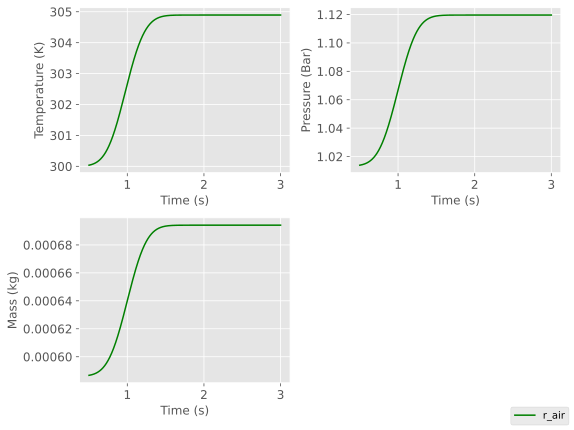

In [127]:
plt.figure(figsize=(8, 6), dpi=40)
plt.subplot(2, 2, 1)
h = plt.plot(states.t, states.T, 'g-')#, states_r_air.t, states_r_air.T, 'b-')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(states.t, states.P / 1e5, 'g-')#, states_r_air.t, states_r_air.P / 1e5, 'b-')
# plt.legend(['r_air','combustor'], 2)
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Bar)')

plt.subplot(2, 2, 3)
plt.plot(states.t, states.V, 'g-')
plt.xlabel('Time (s)')
plt.ylabel('Mass (kg)')

# czy zmiana kolejności napraiw błąd??? 
plt.figlegend(h, ['r_air', 'combustor'], loc='lower right')
plt.tight_layout()
plt.savefig('foo1.png')
plt.show()


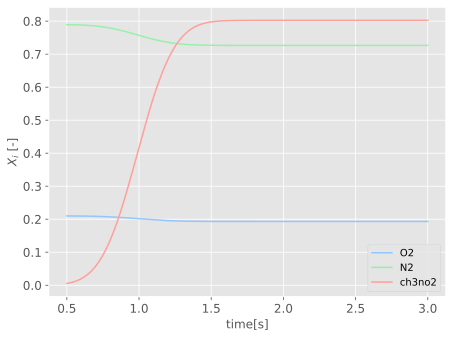

In [130]:
# gas composition

xticks = np.arange(0, 0.18, 0.02)
fig, ax = plt.subplots()
ax.plot(states.t, states('O2').X, label='O2')
ax.plot(states.t, states('N2').X, label='N2')
#ax.plot(states.t, states('oh').X, label='OH')
#ax.plot(states.t, states('h').X, label='H')
#ax.plot(states.t, states('co').X, label='CO')
ax.plot(states.t, states('CH3NO2').X * 10, label='ch3no2')
ax.legend(loc=0)
ax.set_ylabel('$X_i$ [-]')
ax.set_xlabel(r'time[s]')
#ax.set_xticks(xticks)
#ax.set_xticklabels(ca_ticks(xticks))
plt.show()